In [0]:
! pip install spacy # once for session

    100% |████████████████████████████████| 22.0MB 1.8MB/s 
    100% |████████████████████████████████| 122kB 22.8MB/s 
    100% |████████████████████████████████| 1.2MB 13.2MB/s 
    100% |████████████████████████████████| 194kB 22.2MB/s 
    100% |████████████████████████████████| 153kB 23.1MB/s 
    100% |████████████████████████████████| 604kB 15.6MB/s 
    100% |████████████████████████████████| 317kB 16.7MB/s 
    100% |████████████████████████████████| 450kB 16.4MB/s 
    100% |████████████████████████████████| 51kB 18.3MB/s 
  Running setup.py bdist_wheel for spacy ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done
  Stored in directory: /content/.cache/pip/wheels/60/0b/bb/7c2e28db

In [0]:
import numpy as np
import pandas as pd
import spacy
import nltk, re
from nltk.corpus import stopwords
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
! git clone https://github.com/ideis/dl-recsys.git
egagaments1 = pd.read_csv('/content/dl-recsys/data/theepochtimes_com/EET_20180628.zip', index_col=0)
egagaments2 = pd.read_csv('/content/dl-recsys/data/theepochtimes_com/EET_20180627.zip', index_col=0)
egagaments3 = pd.read_csv('/content/dl-recsys/data/theepochtimes_com/EET_20180626.zip', index_col=0)
egagaments4 = pd.read_csv('/content/dl-recsys/data/theepochtimes_com/EET_20180625.zip', index_col=0)
egagaments5 = pd.read_csv('/content/dl-recsys/data/theepochtimes_com/EET_20180624.zip', index_col=0)
egagaments6 = pd.read_csv('/content/dl-recsys/data/theepochtimes_com/EET_20180623.zip', index_col=0)
egagaments7 = pd.read_csv('/content/dl-recsys/data/theepochtimes_com/EET_20180622.zip', index_col=0)


Cloning into 'dl-recsys'...
remote: Counting objects: 47844, done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 47844 (delta 17), reused 29 (delta 13), pack-reused 47811
Receiving objects: 100% (47844/47844), 1.96 GiB | 21.08 MiB/s, done.
Resolving deltas: 100% (44/44), done.
Checking out files: 100% (47775/47775), done.


In [0]:
text = pd.read_csv('/content/dl-recsys/data/theepochtimes_com/pages_EET_22-28.06.18.csv', index_col=0)
egagaments1[-10:]


,fullVisitorId,visitStartTime,pagePath,country
162701,78c1630244e105277df6c28c44db24d8,1530205796,/police-drop-putney-jogger-investigation-a-yea...,United States
162702,78c1630244e105277df6c28c44db24d8,1530205796,/police-drop-putney-jogger-investigation-a-yea...,United States
162703,12fc9c57e17151d91a9a3ab7628c7e57,1530208364,/police-drop-putney-jogger-investigation-a-yea...,Trinidad & Tobago
162704,12fc9c57e17151d91a9a3ab7628c7e57,1530208364,/police-drop-putney-jogger-investigation-a-yea...,Trinidad & Tobago
162705,e5c5adef8d0ecf7813b397acd3253f0d,1530214937,/police-drop-putney-jogger-investigation-a-yea...,United States
162706,e5c5adef8d0ecf7813b397acd3253f0d,1530214937,/top-fast-food-chain-chipotle-closing-65-store...,United States
162707,9570902595abacdf08b7e79b6155f033,1530209910,/police-drop-putney-jogger-investigation-a-yea...,United States
162708,9570902595abacdf08b7e79b6155f033,1530209910,/police-drop-putney-jogger-investigation-a-yea...,United States
162709,b418466c1c53aa02502ef388dcbfa188,1530243562,/police-drop-putney-jogger-investigation-a-yea...,India
162710,b418466c1c53aa02502ef388dcbfa188,1530243562,/top-gun-2-narrows-its-cast-list-for-goose-jr-...,India


In [0]:
combined_csv = pd.concat( [egagaments1,egagaments2,egagaments3, egagaments4, egagaments5, egagaments6, egagaments7 ] )
#combined_csv['pagePath'] = combined_csv['pagePath'].fillna(' ').apply(return_right_from_slash)
print(combined_csv.shape)
combined_csv.head()


(8875228, 4)


,fullVisitorId,visitStartTime,pagePath,country
0,88b526ee2d655644615e5c18fbeb7c5c,1.529661e+09,/,United States
1,88b526ee2d655644615e5c18fbeb7c5c,1.529661e+09,/,United States
2,88b526ee2d655644615e5c18fbeb7c5c,1.529671e+09,/,United States
3,88b526ee2d655644615e5c18fbeb7c5c,1.529671e+09,/,United States
4,bcc947913b50a12baa1d7395597658c8,1.529661e+09,/,United States


In [0]:
combined_csv = combined_csv.drop_duplicates(subset=['fullVisitorId','pagePath'], keep='last')
print(combined_csv.shape)

(856597, 4)


In [0]:
df_result = pd.merge(combined_csv, text, on='pagePath', how='inner', validate = "many_to_one")
print(df_result.shape)
df_result.head()

(800533, 7)


,fullVisitorId,visitStartTime,pagePath,country,id,category,title
0,e4e0606ebe29f32888a4738af5f573dd,1.530220e+09,/police-drop-putney-jogger-investigation-a-yea...,Trinidad & Tobago,277125,"[{""name"": ""/Law & Government/Public Safety/Law...",Police Drop ‘Putney Jogger’ Investigation a Ye...
1,4add05c42063cae12aa6181c4b7df416,1.530221e+09,/police-drop-putney-jogger-investigation-a-yea...,United States,277125,"[{""name"": ""/Law & Government/Public Safety/Law...",Police Drop ‘Putney Jogger’ Investigation a Ye...
2,3c0e9005945e01f34818eb1f26fce2c4,1.530243e+09,/police-drop-putney-jogger-investigation-a-yea...,United States,277125,"[{""name"": ""/Law & Government/Public Safety/Law...",Police Drop ‘Putney Jogger’ Investigation a Ye...
3,a1db030a9f047b326747a5f55678f9d7,1.530206e+09,/police-drop-putney-jogger-investigation-a-yea...,Hungary,277125,"[{""name"": ""/Law & Government/Public Safety/Law...",Police Drop ‘Putney Jogger’ Investigation a Ye...
4,7e6ef7af1fce5eb3dcc51009b6e80528,1.530208e+09,/police-drop-putney-jogger-investigation-a-yea...,United States,277125,"[{""name"": ""/Law & Government/Public Safety/Law...",Police Drop ‘Putney Jogger’ Investigation a Ye...


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [0]:
import keras
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot


Using TensorFlow backend.


In [0]:
n_users, n_ref = len(df_result.fullVisitorId.unique()), len(df_result.id.unique())
n_latent_factors = 3

In [0]:
labels, levels = pd.factorize(df_result['fullVisitorId'])
print(labels)
data = pd.DataFrame()
#for i in labels: data[i] = labels[i]
data['user'] = labels
labels, levels = pd.factorize(df_result['id'])
data['ref'] = labels
data['push'] = np.ones(data['ref'].size, dtype = int)
print(data)

[     0      1      2 ...   7102 569943 569944]
          user   ref  push
0            0     0     1
1            1     0     1
2            2     0     1
3            3     0     1
4            4     0     1
5            5     0     1
6            6     0     1
7            7     0     1
8            8     0     1
9            9     0     1
10          10     0     1
11          11     0     1
12          12     0     1
13          13     0     1
14          14     0     1
15          15     0     1
16          16     0     1
17          17     0     1
18          18     0     1
19          19     0     1
20          20     0     1
21          21     0     1
22          22     0     1
23          23     0     1
24          24     0     1
25          25     0     1
26          26     0     1
27          27     0     1
28          28     0     1
29          29     0     1
...        ...   ...   ...
800503  569920  4904     1
800504  569921  4905     1
800505  569922  4905     1
800506 

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=10000)
train

,user,ref,push
596618,444232,510,1
231859,179239,68,1
544710,331784,341,1
106125,89381,23,1
715436,5813,1628,1
428591,163301,109,1
563549,67619,364,1
325434,252659,85,1
315462,242829,85,1
82080,70593,20,1


In [0]:
user_input = keras.layers.Input(shape=[1],name='Item')
user_embedding = keras.layers.Embedding(n_users + 1, n_latent_factors, name='user-Embedding')(user_input)
user_vec = keras.layers.Flatten(name='FlattenUsers')(user_embedding)

reference_input = keras.layers.Input(shape=[1],name='User')
reference_embedding = keras.layers.Embedding(n_ref + 1, n_latent_factors, name='reference-Embedding')(reference_input)
reference_vec = keras.layers.Flatten(name='FlattenReference')(reference_embedding)
prod = keras.layers.merge([user_vec, reference_vec], mode='dot',name='DotProduct')

In [0]:
model = keras.Model([user_input, reference_input], prod)
model.compile('adam', 'mean_squared_error')

In [0]:
from keras.callbacks import Callback

class Metrics(Callback):
  
  k = 10
    
  def on_train_begin(self, logs={}):
        self.val_recalls = []
        self.val_precisions = []

  def on_epoch_end(self, epoch, logs={}):
        
        val_recall, val_precision = self.calculate_average_recall_and_precision(self.model, test)

        self.val_recalls.append(val_recall)
        self.val_precisions.append(val_precision)
        print(f' - precision@{self.k}: {val_precision} - recall@{self.k}: {val_recall}')
        return
  
  def answer(self, user):
    length = data['ref'].max()
    fd = pd.DataFrame({'user': np.full(length, user), 'ref': range(length)})
    fdv = test_val.set_index(['user']).loc[[user]]
    y_pred = model.predict([fd.user,fd.ref])
    dd = pd.DataFrame({'ind' : range(length)})
    dd['pred'] = y_pred
    dd = dd.sort_values(by = ['pred'])
    y_p = dd[-1:-self.k:-1]
    chisl1 = set(fdv['ref']).intersection(set(y_p['ind'])) #количество угаданных элементов
    chisl = len(chisl1)
    prec =  chisl/self.k
    rec = chisl/fd.user.size
    return prec, rec;

  def calculate_average_recall_and_precision(self, model, source):
    prec, rec = 0, 0
    for i in source.user:
      prec_i, rec_i =  self.answer(i)
      prec += prec_i
      rec += rec_i
    prec = prec/source.user.shape[0]
    rec = rec/source.user.shape[0]
    return prec, rec;

metrics = Metrics()

In [0]:
history_nonneg = model.fit([train.user, train.ref], train.push, epochs=15, batch_size=64,callbacks=[metrics])

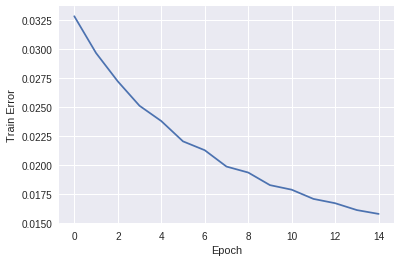

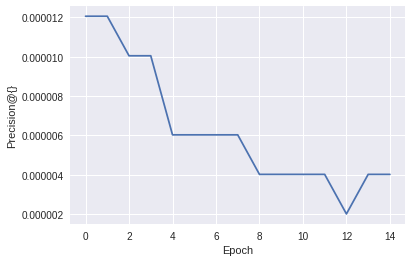

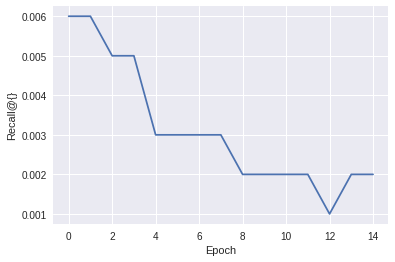

In [0]:
pd.Series(history_nonneg.history['loss']).plot()
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.show()
pd.Series(metrics.val_precisions).plot()
plt.xlabel('Epoch')
plt.ylabel('Precision@{}')
plt.show()

pd.Series(metrics.val_recalls).plot()
plt.xlabel('Epoch')
plt.ylabel('Recall@{}')
plt.show()